In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data loading

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv")
train_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


# EDA
Before training a model to predict calories, I first need to explore the data.

In [3]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [4]:
train_df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [5]:
train_df.isna().any()

id            False
Sex           False
Age           False
Height        False
Weight        False
Duration      False
Heart_Rate    False
Body_Temp     False
Calories      False
dtype: bool

## Univariate Analysis
### Numerical Features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


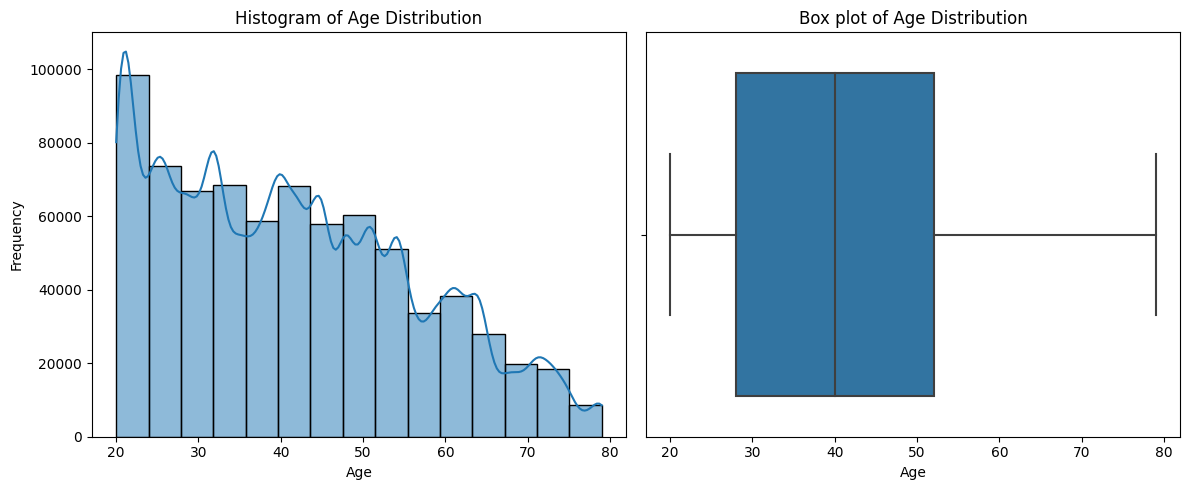

Skewness of the feature is 0.44
Number of missing values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


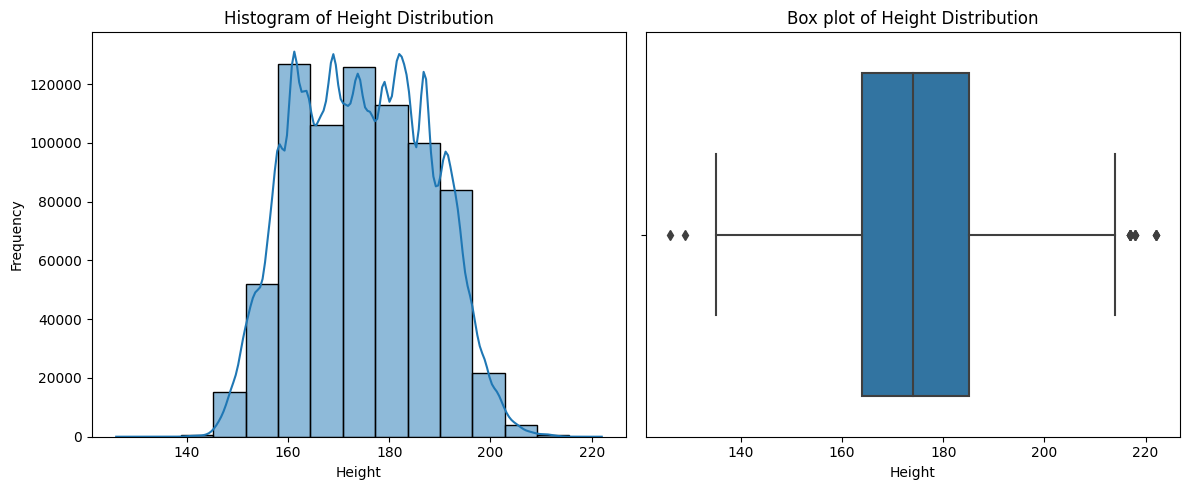

Skewness of the feature is 0.05
Number of missing values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


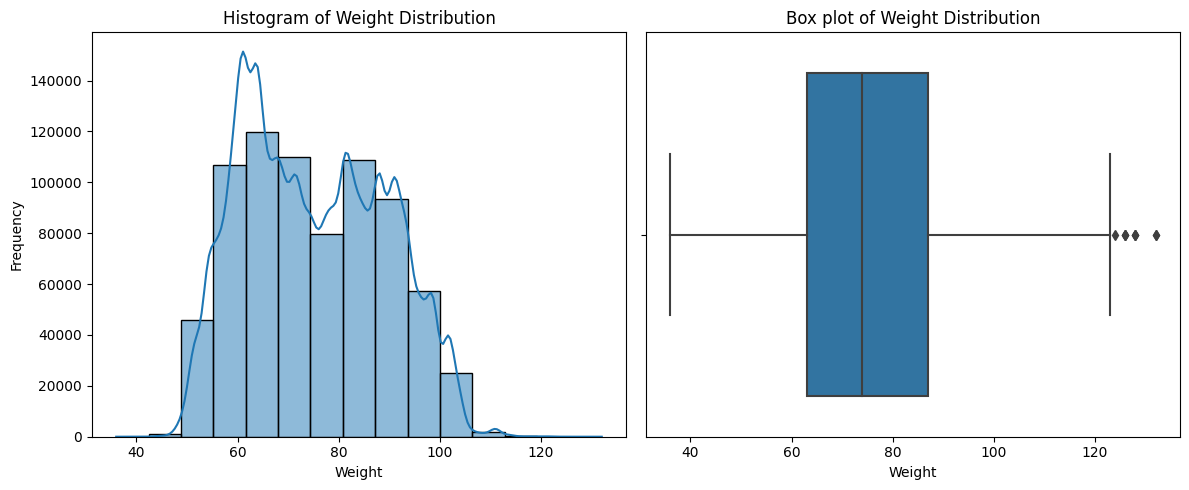

Skewness of the feature is 0.21
Number of missing values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


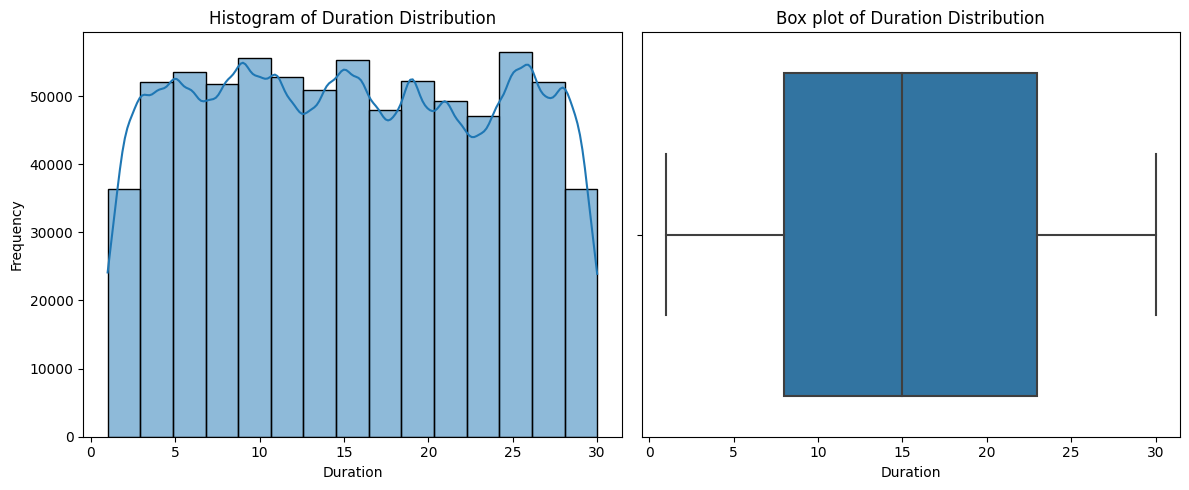

Skewness of the feature is 0.03
Number of missing values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


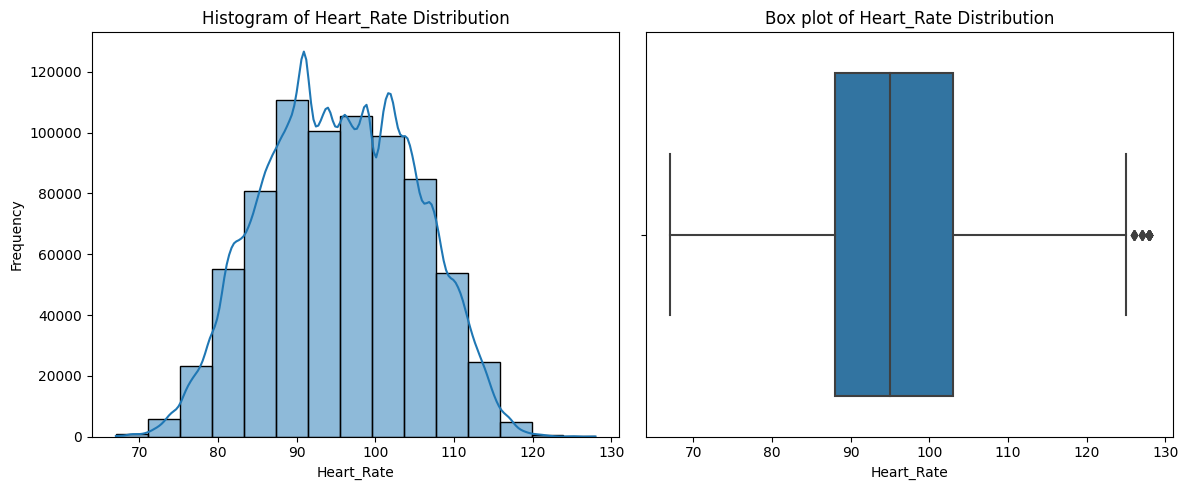

Skewness of the feature is -0.01
Number of missing values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


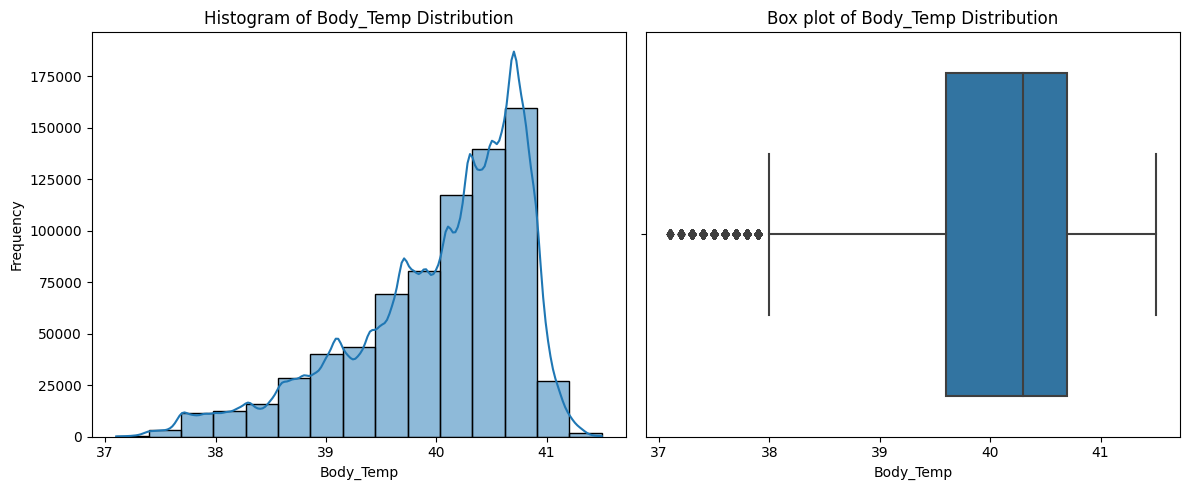

Skewness of the feature is -1.02
Number of missing values: 0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


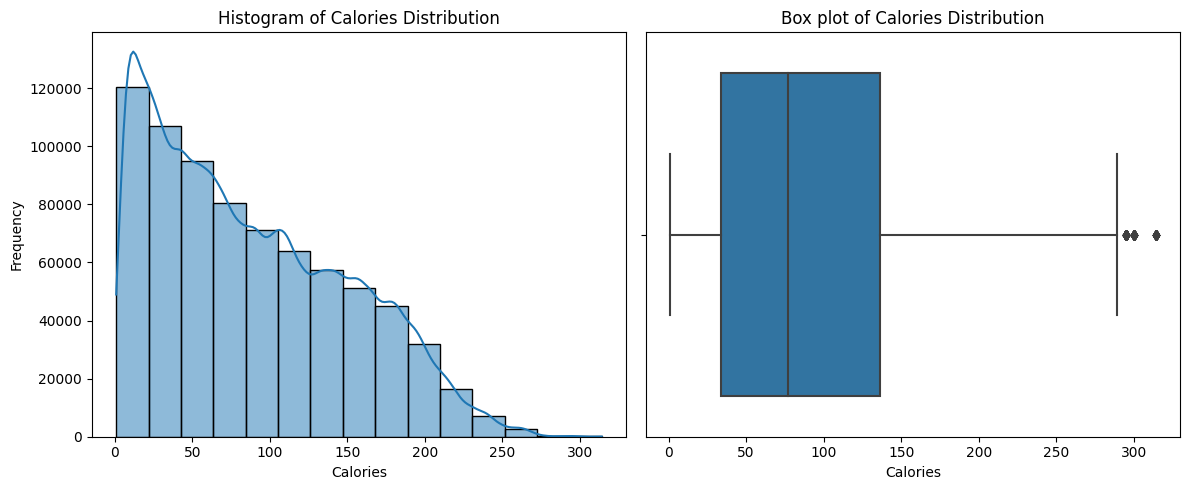

Skewness of the feature is 0.54
Number of missing values: 0


In [6]:
numerical = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
for n in numerical:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(train_df[n], bins=15, kde=True)
    plt.title(f'Histogram of {n} Distribution')
    plt.xlabel(n)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=train_df[n])
    plt.title(f'Box plot of {n} Distribution')
    
    plt.tight_layout()
    plt.show()
    print(f'Skewness of the feature is {train_df[n].skew():.2f}')
    print(f'Number of missing values: {train_df[n].isna().sum()}')

### Categorical Features

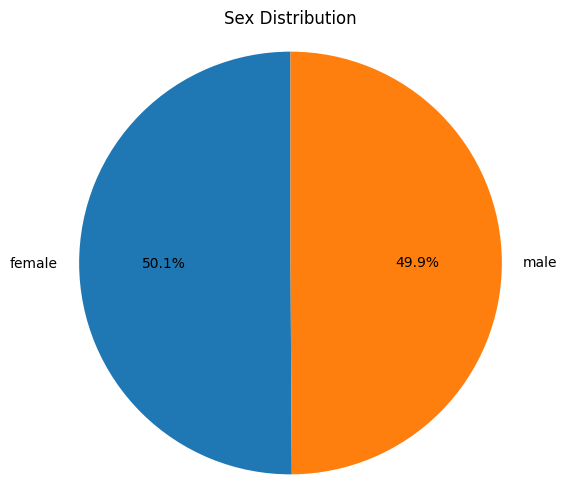

In [7]:
sex_count = train_df['Sex'].value_counts()
plt.figure(figsize= (6,6))
plt.pie(sex_count, labels= sex_count.index
        , autopct='%1.1f%%',startangle=90)
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures circular pie
plt.show()
plt.show()

## Bivariate Analysis

I would like to see the correlation matrix between every feature that correlates greatly to our target (Calories).

<Axes: >

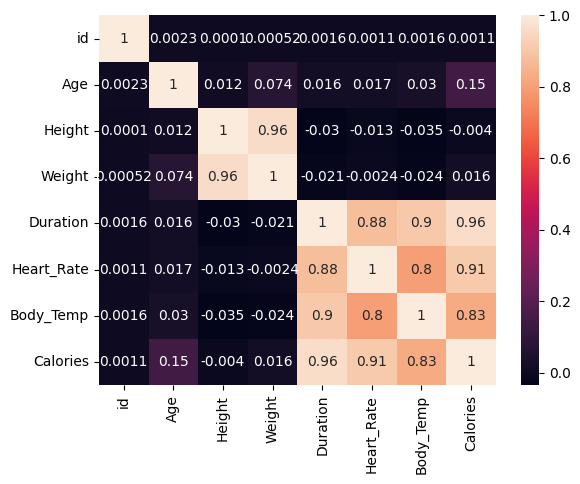

In [8]:
data_corr = train_df.corr(numeric_only=True)
sns.heatmap(data_corr, annot=True)

### Numerical vs Label

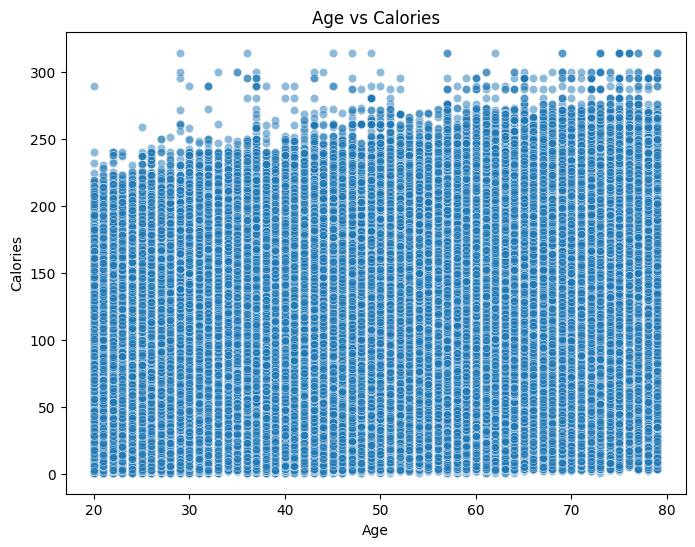

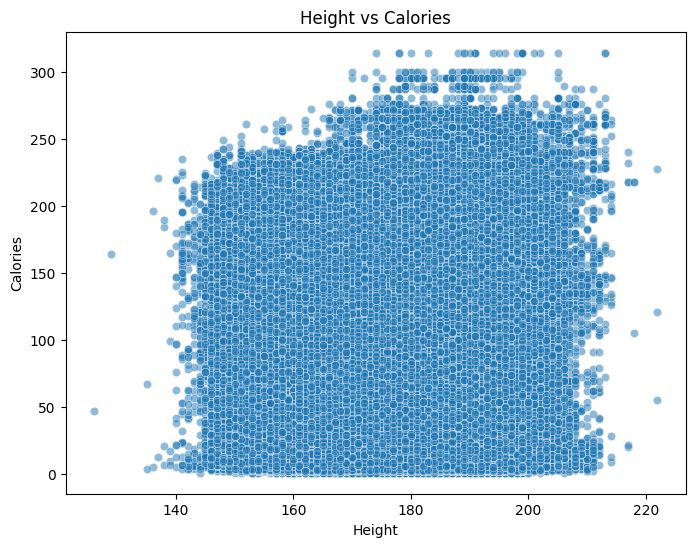

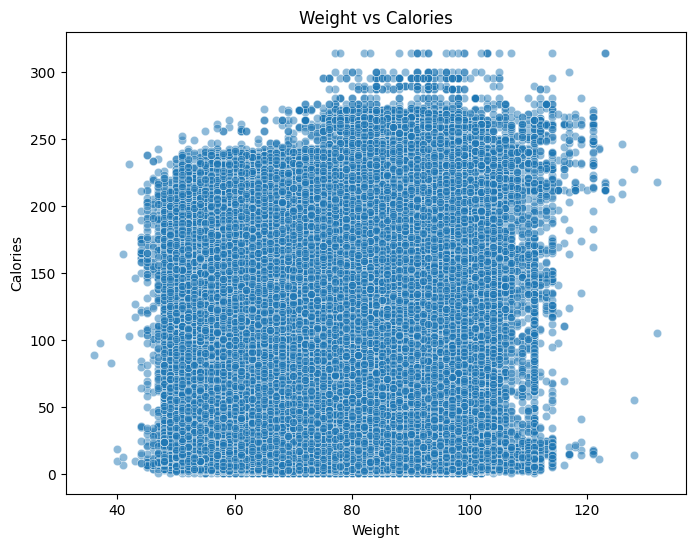

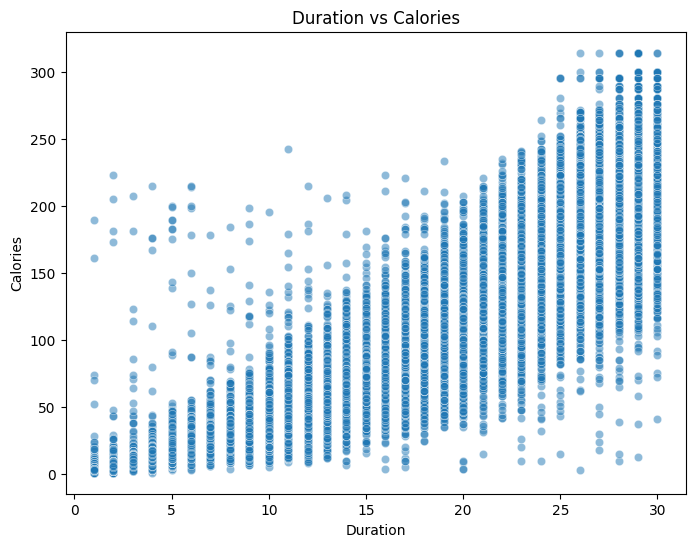

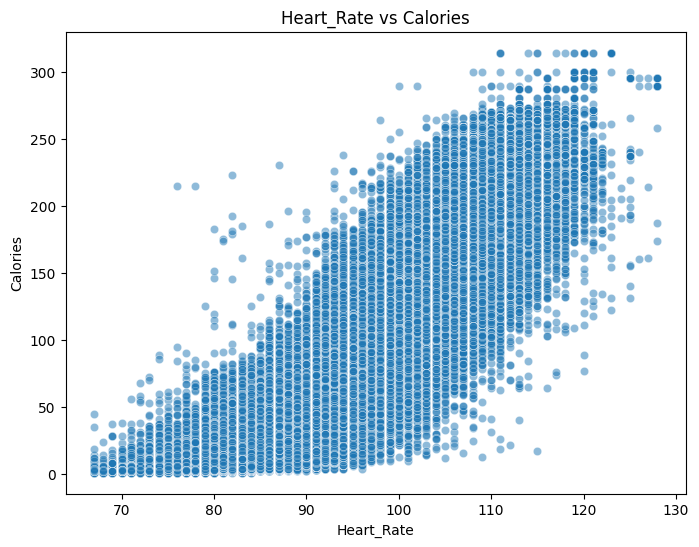

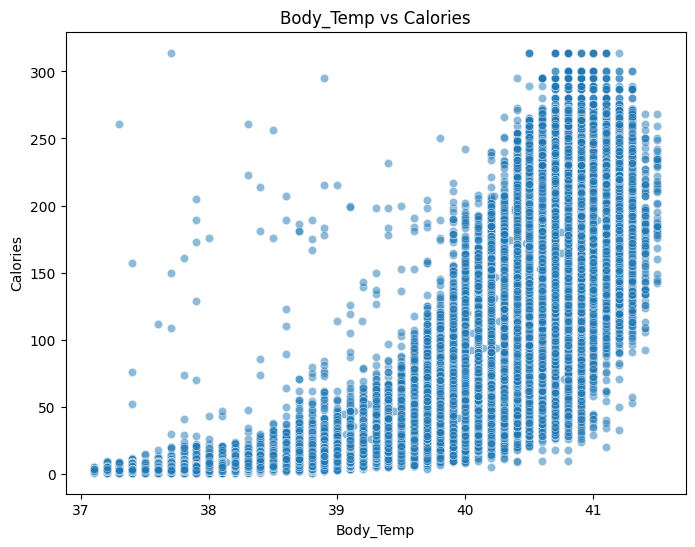

In [9]:
for n in numerical[:-1]:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=train_df[n], y=train_df['Calories'], alpha=0.5)
    plt.xlabel(n)
    plt.ylabel('Calories')
    plt.title(f'{n} vs Calories')
    plt.show()

### Categorical vs Label

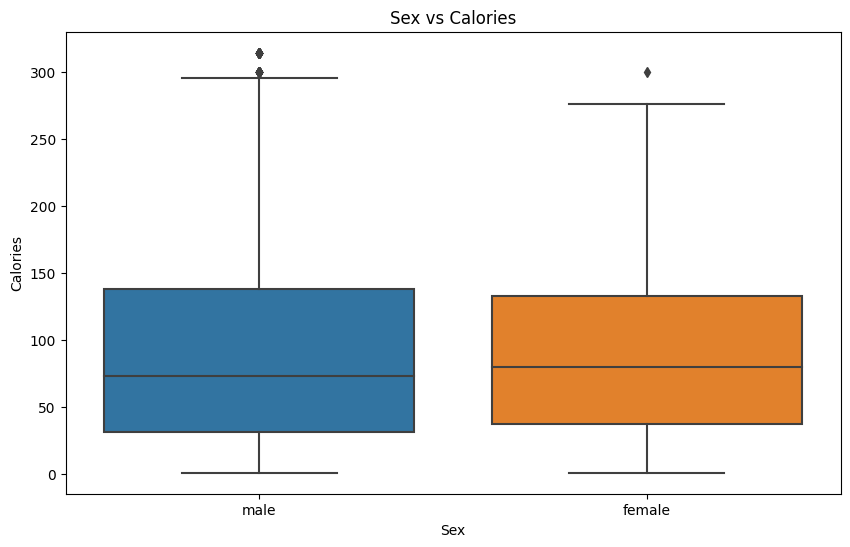

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_df['Sex'], y=train_df['Calories'])
plt.title("Sex vs Calories")
plt.xlabel('Sex')
plt.ylabel("Calories")
plt.show()

# Data Preprocessing

In [11]:
train_df['BMI'] = train_df['Weight']/ ((train_df['Height']/100) **2)

train_df['Sex'] = train_df['Sex'].map({"male": 1, "female": 0})

In [12]:
train_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,22.955684
1,1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,22.582709
2,2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,24.690405
3,3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,24.414062
4,4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,22.136740


In [13]:
test_df['BMI'] = test_df['Weight']/ ((test_df['Height']/100) **2)

test_df['Sex'] = test_df['Sex'].map({"male": 1, "female": 0})

In [14]:
X_train = train_df.drop(['id', 'Calories'], axis =1)
y_train = train_df['Calories']
X_test = test_df.drop(['id'], axis=1)

# Training
Let's start training, all of them looks like to have a kind of linear relation with calories, so I'm gonna first try linear regression and multiple linear regression. We'll see the result

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=101)

In [17]:
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
prediction = model.predict(X_val)

# Metrics

In [19]:
print(f"MSE: {mean_squared_error(y_val, prediction)}")
print(f'MAE: {mean_absolute_error(y_val, prediction)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_val, prediction))}')

MSE: 14.306842732279897
MAE: 2.2855284460450025
RMSE: 3.782438728159373


In [20]:
variance = np.var(y_val)
print(f'NMSE: {mean_squared_error(y_val, prediction)/variance}')

NMSE: 0.003672192514409179


In [21]:
def mdape(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAPE: {mdape(y_val, prediction)}%")

MAPE: 2.224068965517241%


# Submission

In [22]:
test_predict = model.predict(X_test)

In [23]:
results = pd.DataFrame()
results['id'] = test_df['id']
results['Calories'] = test_predict

In [24]:
results.to_csv("submission.csv")